<b><font size="6">|007a|Polynomial Regression|Salary From Level Prediction </font></b>

* **Author**: Dino Giovannoni
* **Date:**: 6-July-2024


**The Problem:** 

Polynomial regression


In [3]:
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv('Position_Salaries_Simple.csv')

In [5]:
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


None

,Position,Level,Salary
0,Business Analyst,1,"R 44,910"
1,Junior Consultant,2,"R 49,290"
2,Senior Consultant,3,"R 60,380"
3,Manager,4,"R 80,480"
4,Country Manager,5,"R 111,400"


The salary column is imported as text. It needs to be converted to a numeric value by first removing the string elements and then converting to an integer value

In [6]:
df['Salary (Thousands)'] = df['Salary'].str.replace('R ', '')
df['Salary (Thousands)'] = df['Salary (Thousands)'].str.replace(',', '')
df['Salary (Thousands)'] = df['Salary (Thousands)'].astype(int)/1000
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Position            10 non-null     object 
 1   Level               10 non-null     int64  
 2   Salary              10 non-null     object 
 3   Salary (Thousands)  10 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes


None

,Position,Level,Salary,Salary (Thousands)
0,Business Analyst,1,"R 44,910",44.91
1,Junior Consultant,2,"R 49,290",49.29
2,Senior Consultant,3,"R 60,380",60.38
3,Manager,4,"R 80,480",80.48
4,Country Manager,5,"R 111,400",111.40


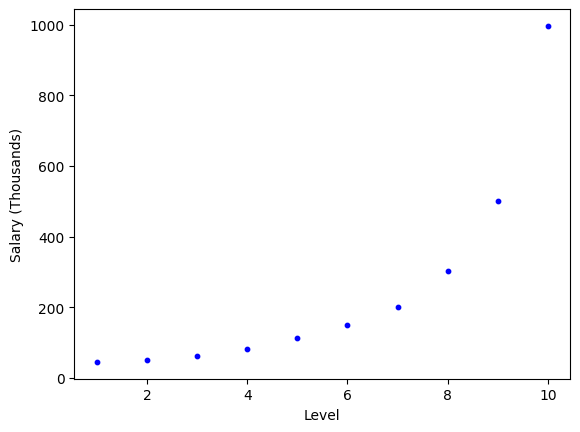

In [7]:
ax = df.plot.scatter(x='Level', y='Salary (Thousands)', c='blue', s=10)

It should be clear that the salary is **not** lineary related to the level. A linear regression should not work very well, but let's try it anyways.

In [8]:
X = np.array(df["Level"]).reshape(-1, 1)
y = np.array(df["Salary (Thousands)"]).reshape(-1, 1)

# Linear Regression Model

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [10]:
m = lin_reg.coef_[0][0]
c = lin_reg.intercept_[0]
print(f'Slope: {np.round(m,2)}, Intercept: {np.round(c,2)}')

Slope: 80.76, Intercept: -194.72


## Evaluate the Linear Regression Model

In [11]:
x_lin = np.linspace(0, 10, 101).reshape(-1, 1)
y_lin = lin_reg.predict(x_lin)

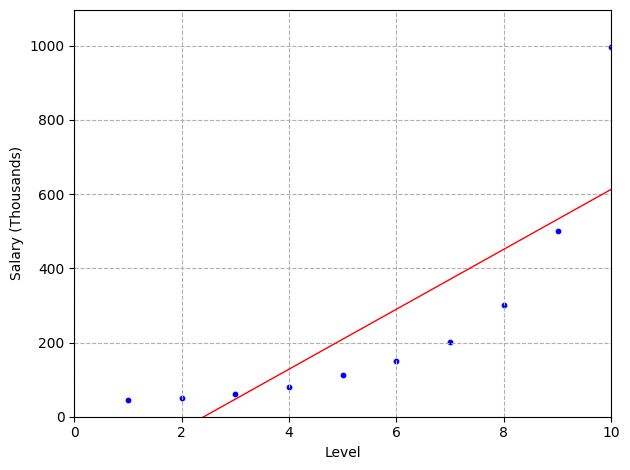

In [12]:
plt.scatter(X, y, color="blue", s=10)
plt.plot(x_lin, y_lin, color="red", linewidth=1)
plt.xlabel('Level')
plt.ylabel('Salary (Thousands)')
plt.xlim([0, 10])
plt.ylim([0, 1.1*max(y)])
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.show()

Just by looking at the linear regression model and the datapoints, we see that this is not a very good fit.

In particular, this is an example of **underfitting**.

## Regression Metrics

In [13]:
y_lin_pred = lin_reg.predict(X)
y_lin_RMSE = np.round(np.sqrt(mean_squared_error(y, y_lin_pred)),2)
print(f'Linear Regression RMSE = R {y_lin_RMSE} thousand')

Linear Regression RMSE = R 162.32 thousand


# Polynomial Regression

## Second-Order Polynomial

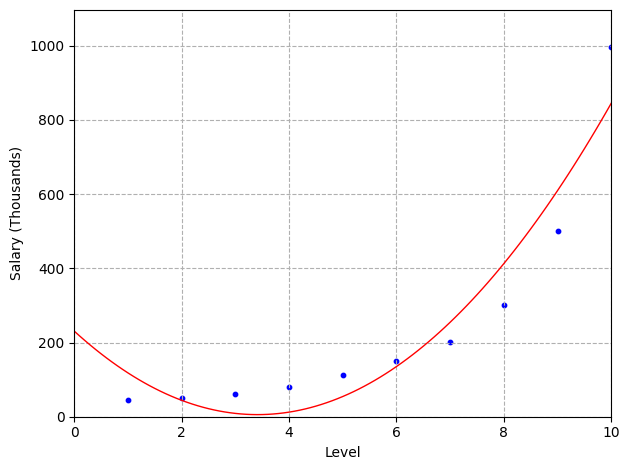

In [14]:
poly_reg = PolynomialFeatures(degree = 2) # build a polynomial up to the 2nd degree.
X_poly2 = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly2, y)

x_poly2 = poly_reg.fit_transform(x_lin)
y_poly2 = lin_reg_2.predict(x_poly2)

plt.scatter(X, y, color="blue", s=10)
plt.plot(x_lin, y_poly2, color="red", linewidth=1)
plt.xlabel('Level')
plt.ylabel('Salary (Thousands)')
plt.xlim([0, 10])
plt.ylim([0, 1.1*max(y)])
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.show()

### Regression Metrics

In [15]:
y_poly2_pred = lin_reg_2.predict(X_poly2)
y_poly2_RMSE = np.round(np.sqrt(mean_squared_error(y, y_poly2_pred)),2)
print(f'Polynomial 2nd Regression RMSE = R {y_poly2_RMSE} thousand')

Polynomial 2nd Regression RMSE = R 81.48 thousand


## Third-Order Polynomial

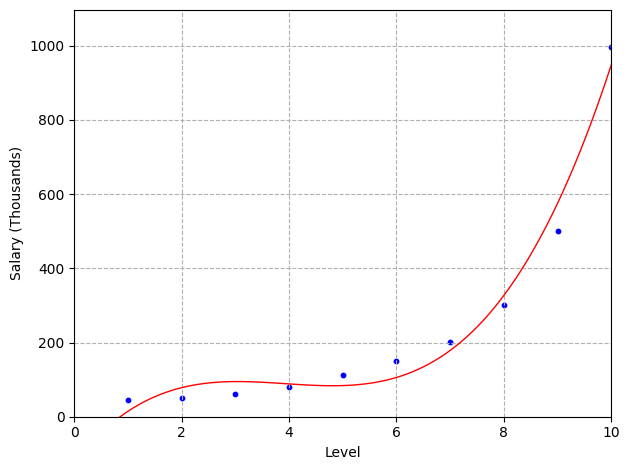

In [16]:
poly_reg = PolynomialFeatures(degree = 3) # build a polynomial up to the 3rd degree.
X_poly3 = poly_reg.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly3, y)

x_poly3 = poly_reg.fit_transform(x_lin)
y_poly3 = lin_reg_3.predict(x_poly3)

plt.scatter(X, y, color="blue", s=10)
plt.plot(x_lin, y_poly3, color="red", linewidth=1)
plt.xlabel('Level')
plt.ylabel('Salary (Thousands)')
plt.xlim([0, 10])
plt.ylim([0, 1.1*max(y)])
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.show()

### Regression Metrics

In [17]:
y_poly3_pred = lin_reg_3.predict(X_poly3)
y_poly3_RMSE = np.round(np.sqrt(mean_squared_error(y, y_poly3_pred)),2)
print(f'Polynomial 3rd Regression RMSE = R {y_poly3_RMSE} thousand')

Polynomial 3rd Regression RMSE = R 38.44 thousand


## Fourth-Order Polynomial

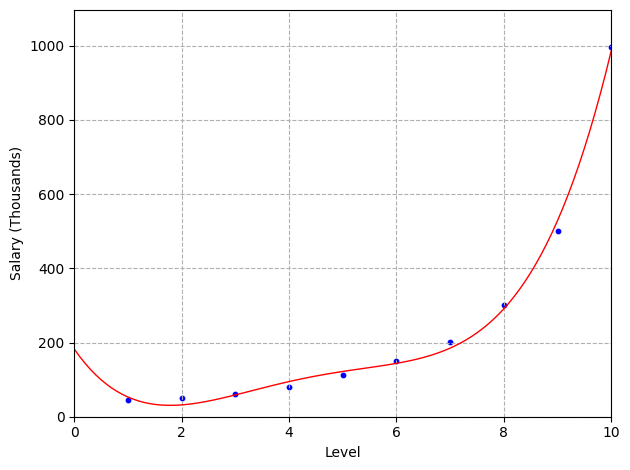

In [18]:
poly_reg = PolynomialFeatures(degree = 4) # build a polynomial up to the 3rd degree.
X_poly4 = poly_reg.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly4, y)

x_poly4 = poly_reg.fit_transform(x_lin)
y_poly4 = lin_reg_4.predict(x_poly4)

plt.scatter(X, y, color="blue", s=10)
plt.plot(x_lin, y_poly4, color="red", linewidth=1)
plt.xlabel('Level')
plt.ylabel('Salary (Thousands)')
plt.xlim([0, 10])
plt.ylim([0, 1.1*max(y)])
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.show()

### Regression Metrics

In [19]:
y_poly4_pred = lin_reg_4.predict(X_poly4)
y_poly4_RMSE = np.round(np.sqrt(mean_squared_error(y, y_poly4_pred)),2)
print(f'Polynomial 4th Regression RMSE = R {y_poly4_RMSE} thousand')

Polynomial 4th Regression RMSE = R 14.16 thousand


## 11th-Order Polynomial

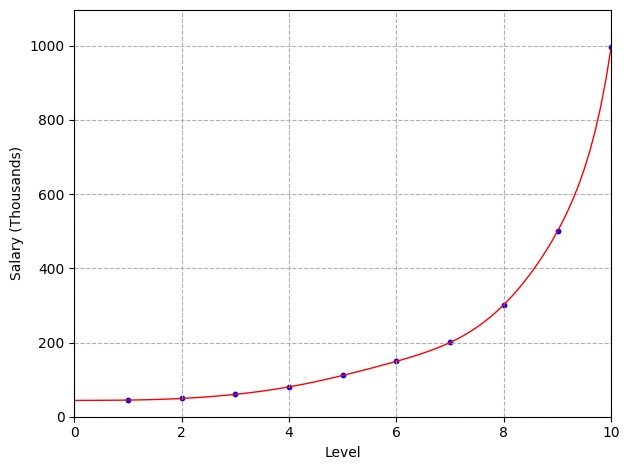

In [20]:
poly_reg = PolynomialFeatures(degree = 11) # build a polynomial up to the 11th degree.
X_poly11 = poly_reg.fit_transform(X)
lin_reg_11 = LinearRegression()
lin_reg_11.fit(X_poly11, y)

x_poly11 = poly_reg.fit_transform(x_lin)
y_poly11 = lin_reg_11.predict(x_poly11)

plt.scatter(X, y, color="blue", s=10)
plt.plot(x_lin, y_poly11, color="red", linewidth=1)
plt.xlabel('Level')
plt.ylabel('Salary (Thousands)')
plt.xlim([0, 10])
plt.ylim([0, 1.1*max(y)])
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.show()

### Regression Metrics

In [21]:
y_poly11_pred = lin_reg_11.predict(X_poly11)
y_poly11_RMSE = np.round(np.sqrt(mean_squared_error(y, y_poly11_pred)),4)
print(f'Polynomial 11th Regression RMSE = R {y_poly11_RMSE} thousand')

Polynomial 11th Regression RMSE = R 0.0 thousand


## 35th-Order Polynomial

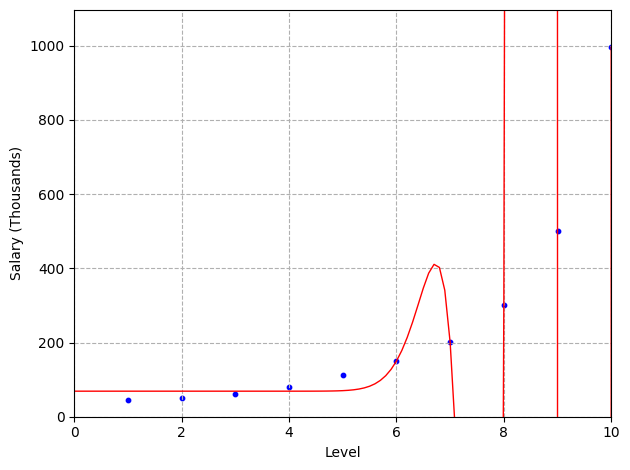

In [22]:
poly_reg = PolynomialFeatures(degree = 35) # build a polynomial up to the 35th degree.
X_poly35 = poly_reg.fit_transform(X)
lin_reg_35 = LinearRegression()
lin_reg_35.fit(X_poly35, y)

x_poly35 = poly_reg.fit_transform(x_lin)
y_poly35 = lin_reg_35.predict(x_poly35)

plt.scatter(X, y, color="blue", s=10)
plt.plot(x_lin, y_poly35, color="red", linewidth=1)
plt.xlabel('Level')
plt.ylabel('Salary (Thousands)')
plt.xlim([0, 10])
plt.ylim([0, 1.1*max(y)])
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.show()

### Regression Metrics

In [23]:
y_poly35_pred = lin_reg_35.predict(X_poly35)
y_poly35_RMSE = np.round(np.sqrt(mean_squared_error(y, y_poly35_pred)),2)
print(f'Polynomial 35th Regression RMSE = R {y_poly35_RMSE} thousand')

Polynomial 35th Regression RMSE = R 16.9 thousand
